# 1.통계분석
- Carseats 데이터는 자동차 좌석 판매정보
    - 수치형 : Sales, CompPrice, Income, Advertising, Population, Price, Age, Education
    - 범주형 : ShelveLoc, Urban, US

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = (12, 5)
plt.rcParams['axes.unicode_minus'] = False

carseats = pd.read_csv('Carseats.csv')

### 1. 
- Urban 변수에 따른 Sales의 차이가 있는지, 통계적으로 검증하기 위한 통계분석 수행. 결과해석 (정규성 만족 가정)

In [2]:
urban_y = carseats[carseats.Urban=='Yes'].Sales
urban_n = carseats[carseats.Urban=='No'].Sales

In [3]:
from scipy.stats import ttest_ind

tstat, p = ttest_ind(urban_y, urban_n, equal_var=True, alternative='two-sided')
print('검정통계량 : {:.3f}, 유의확률 : {:3f}'.format(tstat, p))

# 귀무가설 : urban==Yes인 경우와 urban=False인 경우 평균의 차이는 없다.
# 대립가설 : urban==Yes인 경우와 urban=False인 경우 평균의 차이는 있다.

# 검정통계량은 -0.308이고 이 때, 유의확률은 0.75이므로 귀무가설을 기각할 수 없다. 즉 평균의 차이는 없다.

검정통계량 : -0.308, 유의확률 : 0.758507


### 2. 
- Sales 변수와 CompPrice, Income, Advertising, Population, Price, Age, Education 변수들 사이의 관계를 피어슨 상관계수를 이용한 상관관계 분석 수행 후 해석하시오.

<Axes: >

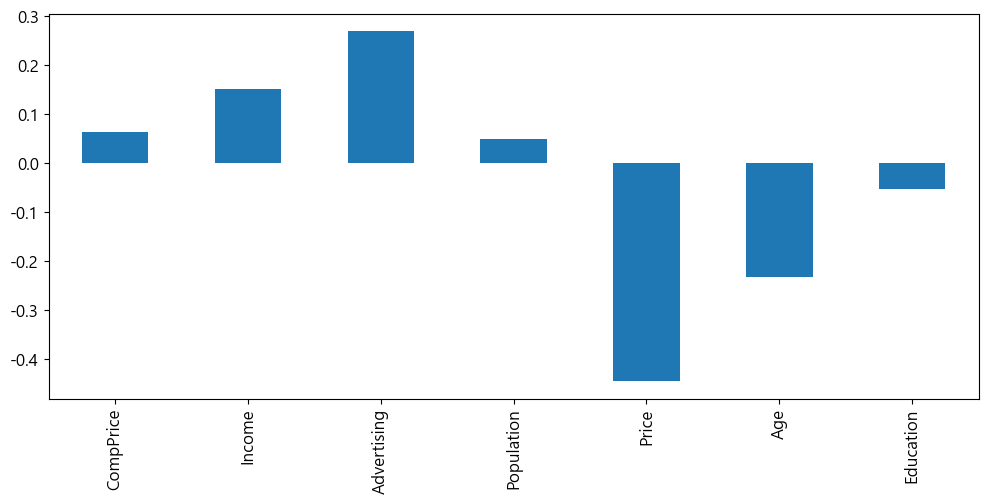

In [4]:
data2 = carseats[['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']]
corr_table = data2.corr(method='pearson')
corr_table.Sales[1:].plot(kind='bar')

# Sales와 Price는 음의 상관관계를 가진다고 볼 수 있고,
# Age는 낮은 음의 상관관계, Advertizing은 낮은 양의 상관관계를 갖는다고 볼수 있다.

### 3. 
- 종속변수를 Sales, 독립변수를 CompPrice, Income, Advertising, Population, Price, Age, Education로 설정하고, 후진제거법을 활용하여 회귀분석을 실시하고, 추정된 회귀식을 작성하시오.

In [5]:
from sklearn.preprocessing import StandardScaler
from itertools import combinations
import statsmodels.api as sm

def stepwise_method_AIC(X, y):
    result = pd.DataFrame()
    feature_combis=[]
    for i in range(1, len(X.columns)+1):
        feature_combis += list(combinations(X.columns, i))
    feature_combis.reverse()

    for j, combi in enumerate(feature_combis):
        X_=X.filter(combi)
        X_=sm.add_constant(X_)
        model = sm.OLS(y, X_)
        fitted = model.fit()

        n = fitted.nobs
        p = fitted.df_model
        if j==0:
            MSE_full = fitted.mse_resid

        result.loc[j, 'feature_combi'] = ', '.join(list(fitted.params.keys()))
        result.loc[j, 'AIC'] = fitted.aic

        result = result.sort_values(by='AIC', ascending=True)
        best = result.iloc[0, 0]
    return best, result

y = carseats[['Sales']]
X = carseats[['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']]

stepwise_method_AIC(X, y)

('const, CompPrice, Income, Advertising, Price, Age',
                                          feature_combi          AIC
 25   const, CompPrice, Income, Advertising, Price, Age  1665.834569
 4    const, CompPrice, Income, Advertising, Price, ...  1666.680597
 7    const, CompPrice, Income, Advertising, Populat...  1667.829320
 0    const, CompPrice, Income, Advertising, Populat...  1668.647466
 50           const, CompPrice, Advertising, Price, Age  1678.074227
 ..                                                 ...          ...
 123                                  const, Population  1967.685393
 117                       const, CompPrice, Population  1967.762118
 114                        const, CompPrice, Education  1967.904785
 102                       const, Population, Education  1968.804134
 87             const, CompPrice, Population, Education  1968.835948
 
 [127 rows x 2 columns])

In [6]:
y = carseats[['Sales']]
X = carseats[['CompPrice', 'Income', 'Advertising', 'Price', 'Age']]

X_ = sm.add_constant(X)
model = sm.OLS(y, X_)
fitted = model.fit()

fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     92.62
Date:                Mon, 01 Sep 2025   Prob (F-statistic):           2.70e-64
Time:                        23:23:13   Log-Likelihood:                -826.92
No. Observations:                 400   AIC:                             1666.
Df Residuals:                     394   BIC:                             1690.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           7.1092      0.944      7.531      0.000       5.253       8.965
CompPrice       0.0939      0.008     12.051      0.000       0.079       0.109
Income          0.0131      0.003      3.779      0.000       0.006       0.020
Advertising     0.1306      0.015      8.963      0.000       0.102       0.159
Price          -0.0925      0.005    -18.347      0.000      -0.102      -0.083
Age            -0.0450      0.006     -7.503      0.000      -0.057      -0.033
==============================================================================
Omnibus:                        9.073   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.154
Skew:                           0.288   Prob(JB):                       0.0170
Kurtosis:                       2.602   Cond. No.                     1.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 회귀분석의 가정 검토
- 정규성 가정
    - Jarque-Bera 통계량은 귀무가설이 정규성을 갖는 것이고, 정규성을 갖지 않는 것이 대립가설이다. 8.154, 유의확률은 0.017로 유의수준 0.05에서 귀무가설이 지지되지 않는다. 즉 잔차의 정규성은 보장되지 않는다.
    - 왜도(skew)는 0이면 치우침이 없고, 음수이면 좌측 긴 꼬리, 양수이면 우측 긴꼬리를 의미한다. 0.288은 오른쪽으로 약간 긴꼬리를 갖는다. 첨도(kurtosis)는 3이면 적당, 3보다 크면 뾰족하고 3보다 작으면 옆으로 퍼지는 것을 의미하는데, 2.602로 적정함을 의미한다.
- 등분산성 가정
    - 등분산성은 아래 각 특성에 따른 표준화 잔차의 분포를 보았을 때, 잔차의 등분산성은 보장된다.
- 독립성 가정
    - 독립성은 Durbin-watson으로 분석하는데, 2를 기준으로 4에 가까워질수록 잔차 간 양의 상관이 있고, 0에 가까워질수록 잔차간 음의 상관이 있다고 본다. 통계량은 1.963으로 잔차 간 자기상관은 없는 것으로 볼 수 있다.

#### 회귀분석 결과 해석
- 모형에 대한 설명
    - 이 모형에서 설명변수는 CompPrice, Income, Advertising, Price, Age이고 종속변수는 Sales이다. Sales값의 예측을 위해 설명변수들을 가지고 회귀분석을 수행하여 회계계수를 추정한다.
- 회귀식의 유의성 해석
    - 분석 결과 회귀식의 유의성 해석은 F검정을 이용한다. F검정에서 귀무가설은 모든 회귀가설은 0이다 / 대립가설은 적어도 하나는 0이 아니다. F통계량은 96.62이고 이때 유의확률이 2.70e-64와 같아 유의수준 0.01에서 회귀식은 유의하다.
- 회귀계수의 유의성 해석
    - 각 회귀계수에 대한 t검정 시 귀무가설은 "회귀계수는 0이다.", 대립가설은 "회귀계수는 0이 아니다."와 같다. p-value가 0.05보다 작은 경우 유의수준 5%에서 귀무가설이 지지되지 않는다.
    - CompPrice의 점추정량은 0.0939이고 p-value가 0.001보다 작아 유의하다.
    - Income의 점추정량은 0.0131이고 p-value가 0.001보다 작아 유의하다.
    - Advertising의 점추정량은 0.1306이고 p-value가 0.001보다 작아 유의하다.
    - Price의 점추정량은 -0.0925이고 p-value가 0.001보다 작아 유의하다.
    - Age의 점추정량은 -0.0450이고 p-value가 0.001보다 작아 유의하다.
- 회귀식의 설명력 해석
    - 회귀식의 설명력은 Adj. R-squared로 볼수 있는데 0.534로 약 53% 설명력을 갖는다고 볼 수 있다.
- 회귀계수의 추정 및 회귀식 설명
    - 추정된 회귀식은 다음과 같다.
        - Sales = 7.1092 + 0.0939*CompPrice, 0.0131*Income, 0.1306*Advertising, -0.0925*Price, -0.0450*Age
    - Comprice와 Income의 경우 Sales와 약한 양의 상관관계, Price와 Age의 경우 Sales와 음의 상관관계를 갖는다.

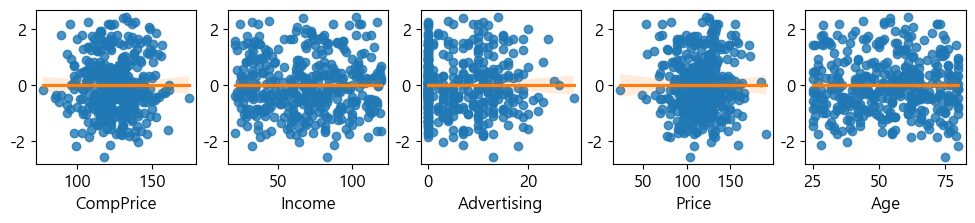

In [7]:
# 등분산성 가정 확인
import seaborn as sns
from scipy.stats import zscore
sresid = zscore(fitted.resid)

fig, ax = plt.subplots(1, 5, figsize=(12, 2))
for feature, ax in zip(X.columns, ax.ravel()):
    sns.regplot(x=X[feature], y=sresid, line_kws={'color':'C1'}, ax=ax)
plt.show()

# 2.정형 데이터마이닝
- BlackFriday 데이터
    - 문자형 : User_ID
    - 범주형 : Product_ID, Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Matital_Status, Product_Category_1, Product_Category_2, Product_Category_3, 
    - 수치형 : Purchase

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (12, 4)
plt.rcParams['axes.unicode_minus'] = False

friday = pd.read_csv('BlackFriday.csv')
friday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


#### 1.
- Product_Category_2, Product_Category_3 특성의 NA값을 0으로 대체
- Product_Category_1, Product_Category_2, Product_Category_3의 데이터를 다 더한 Product_all 변수를 생성하여 추가하라
- User_Id를 character변수로, Occupation, Marital_Status, Product_Category_1, Product_Category_2, Product_Category_3를 범주형 변수로 변환하시오.
- Gender, Age,City_Category, Stay_In_Current_City_Years를 dummy변수로 변환한 후 추가하시오.

In [68]:
#문자형 : User_ID
#범주형 : Product_ID, Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category_1, Product_Category_2, Product_Category_3, 
#수치형 : Purchase
data1 = friday.copy()

# Product_Category_2, Product_Category_3 특성의 NA값을 0으로 대체
data1.Product_Category_2 = data1.Product_Category_2.fillna(0)
data1.Product_Category_3 = data1.Product_Category_3.fillna(0)

# Product_Category_1, Product_Category_2, Product_Category_3의 데이터를 다 더한 Product_all 변수를 생성하여 추가하라
data1['Product_all'] = data1.Product_Category_1 + data1.Product_Category_2 + data1.Product_Category_3

# User_Id를 character변수로, Occupation, Marital_Status, Product_Category_1, Product_Category_2, Product_Category_3를 범주형 변수로 변환하시오.
data1.User_ID = data1.User_ID.to_string()
data1.Occupation = data1.Occupation.to_numpy(dtype='int')
data1.Marital_Status = data1.Marital_Status.to_numpy(dtype='int')
data1.Product_Category_1 = data1.Product_Category_1.to_numpy(dtype='int')
data1.Product_Category_2 = data1.Product_Category_2.to_numpy(dtype='int')
data1.Product_Category_3 = data1.Product_Category_3.to_numpy(dtype='int')

# Gender, Age,City_Category, Stay_In_Current_City_Years를 dummy변수로 변환한 후 추가하시오.
#data1.Gender = data1.Gender.map({'F':0, 'M':1})
#data1.Age = data1.Age.map({'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6})
#data1.Stay_In_Current_City_Years = data1.Stay_In_Current_City_Years.map({'0':0, '1':1, '2':2, '3':3, '4+':4})
#data1.City_Category = data1.City_Category.map({'A':0, 'B':1, 'C':2})
data1_dumm  = pd.get_dummies(data1[['Gender', 'Age','City_Category', 'Stay_In_Current_City_Years']], dtype='int')

data1 = pd.concat([data1, data1_dumm], axis=1)
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   User_ID                        537577 non-null  object 
 1   Product_ID                     537577 non-null  object 
 2   Gender                         537577 non-null  object 
 3   Age                            537577 non-null  object 
 4   Occupation                     537577 non-null  int32  
 5   City_Category                  537577 non-null  object 
 6   Stay_In_Current_City_Years     537577 non-null  object 
 7   Marital_Status                 537577 non-null  int32  
 8   Product_Category_1             537577 non-null  int32  
 9   Product_Category_2             537577 non-null  int32  
 10  Product_Category_3             537577 non-null  int32  
 11  Purchase                       537577 non-null  int64  
 12  Product_all                   

#### 2.
- 1에서 전처리 후, User_ID, Product_ID, Gender, Age,City_Category, Stay_In_Current_City_Years, Product_all 변수를 제외한 나머지 변수들을 활용하여, K-means 군집분석을 수행하고 해석하시오.
- 범주형 변수는 수치형 변수로 변환, 최적의 군집 개수를 찾을 수 있도록, 군집 개수가 이전 결과와 다르면 분석을 다시 수행하시오.

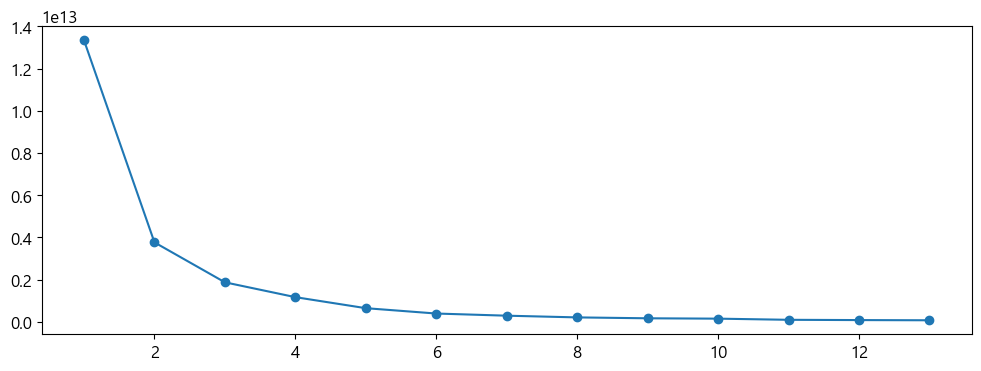

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.cluster import KMeans

# 군집분석에 사용할 특성만 추출
data2 = data1.drop(['User_ID', 'Product_ID', 'Gender', 'Age','City_Category', 'Stay_In_Current_City_Years', 'Product_all'], axis=1)

# 군집분석 수행
MSE = []
n_clusters = range(1, 14, 1)
for n in n_clusters:
    model = KMeans(n_init='auto', n_clusters=n).fit(data2)
    MSE.append(model.inertia_)

plt.plot(list(range(1, 14, 1)), MSE, marker='o')

# KMeans의 inertia 값은 군집화 결과 형성된 하나의 군집 내 원소들이 얼마나 가까이 모여있는지를 나타내는 지표이다.
# 아래 Inertial 그래프는 군집의 개수를 1개부터 14개로 늘려가면서 군집분석 시 inertia 값을 표시하고 있는데,
# 3개일 때 까지 급격히 개선되는 모습을 보였고, 4개부터는 거의 차이가 나지 않는 양상을 보인다.
# 따라서 적정 군집개수는 4개로 볼 수 있다.


#### 3.
- 최적의 군집개수를 찾아 재수행한 군집분석의 결과로 분류된 군집번호를 원본 데이터인 Blackfriday 데이터의 각 행에 맞게 labeling하여 clust라는 변수로 저장
- clust별 특성을 파악하여 설명하시오.

In [73]:
model = KMeans(n_init='auto', n_clusters=4).fit(data2)
friday['clust'] = model.labels_

# 이 주제에서 분석해야 할 것은 연령대, 성별, 결혼여부, 거주지역으로 볼 수 있다.

In [83]:
friday.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,clust
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,2
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,3


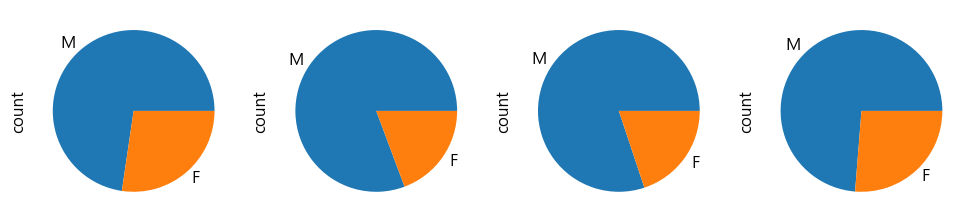

In [ ]:
# 성별 분석
fig, ax = plt.subplots(1, 4)
for cl, ax in zip(list(range(0, 4, 1)), ax.ravel()):
    friday[friday.clust==cl].Gender.value_counts().plot.pie(ax=ax)


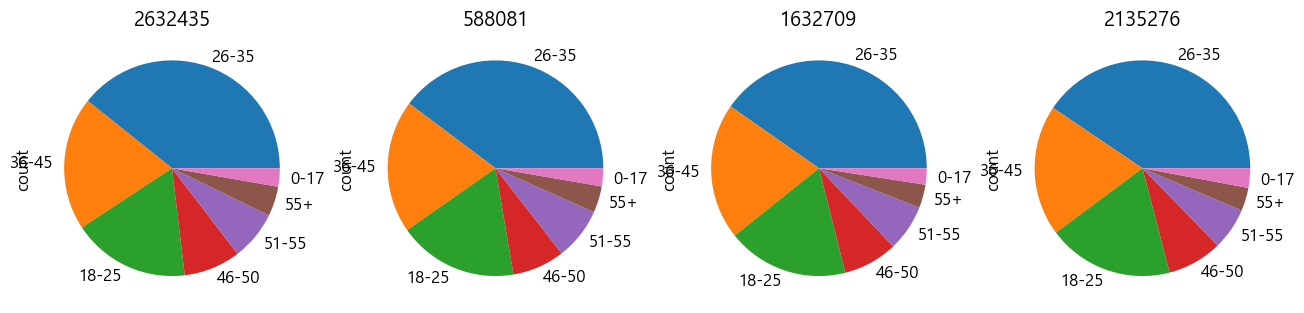

In [93]:
# 연령대 분석 
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
for cl, a in zip(list(range(0, 4, 1)), ax.ravel()):
    friday[friday.clust==cl].Age.value_counts().plot.pie(ax=a, title=friday[friday.clust==cl].size)

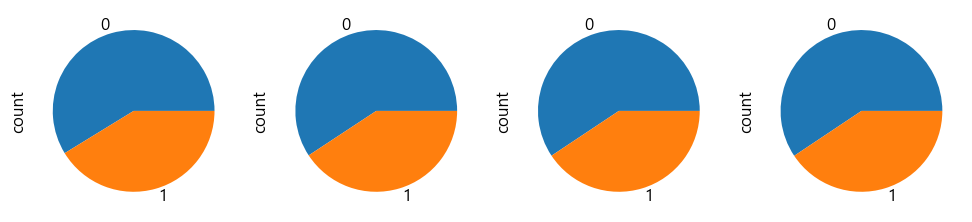

In [94]:
# 결혼여부 
fig, ax = plt.subplots(1, 4)
for cl, ax in zip(list(range(0, 4, 1)), ax.ravel()):
    friday[friday.clust==cl].Marital_Status.value_counts().plot.pie(ax=ax)

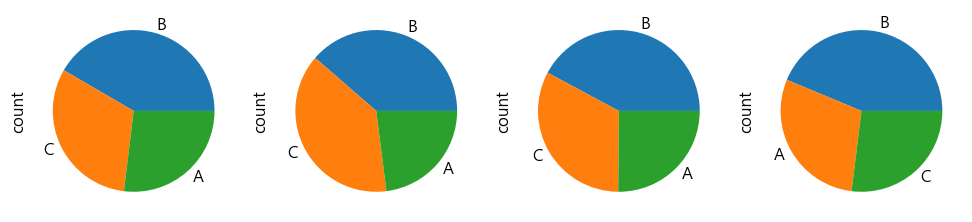

In [95]:
# 거주지역
fig, ax = plt.subplots(1, 4)
for cl, ax in zip(list(range(0, 4, 1)), ax.ravel()):
    friday[friday.clust==cl].City_Category.value_counts().plot.pie(ax=ax)

8283.688179955061
19712.885293012358
14006.039635966972
4197.517302681246


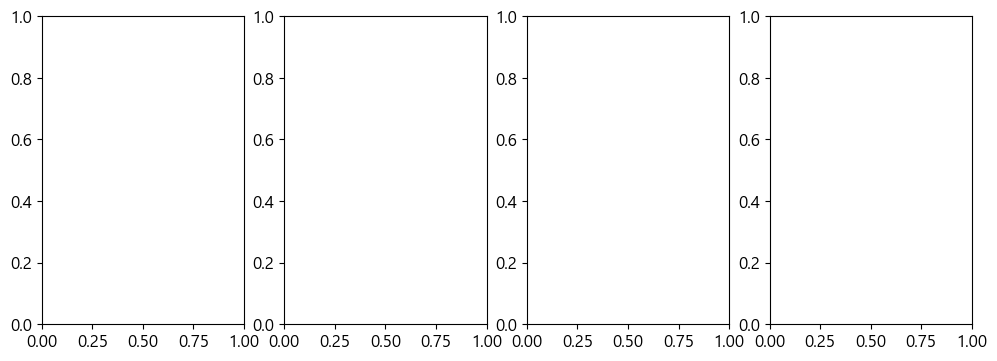

In [96]:
# 평균구매 금액
fig, ax = plt.subplots(1, 4)
for cl, ax in zip(list(range(0, 4, 1)), ax.ravel()):
    print(friday[friday.clust==cl].Purchase.mean())

https://stackoverflow.com/questions/53308054/pandas-groupby-group-visualization-by-dividing-between-groups

In [ ]:
# 연령대별 지출분석
# 지역별 지출분석
